In [28]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

import random

In [29]:
np.random.seed(0)

In [33]:
#config = tf.ConfigProto(intra_op_parallelism_threads=16, inter_op_parallelism_threads=2, allow_soft_placement=True, device_count = {'CPU': 16})
#session = tf.Session(config=config)

#tf.config.threading.set_inter_op_parallelism_threads( num_threads = 32 )
#tf.config.threading.set_intra_op_parallelism_threads()
#tf.config.set_soft_device_placement(enabled)

In [34]:
( X_train, y_train ), ( X_test, y_test ) = mnist.load_data()

In [35]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [36]:
assert( X_train.shape[ 0 ] == y_train.shape[ 0 ]), "Training data: #images != #labels"
assert( X_test.shape[ 0 ] == y_test.shape[ 0 ]), "Testing data: #images != #labels"
assert( X_train.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."
assert( X_test.shape[ 1: ] == ( 28, 28 ) ), "The dimensions of the images have to be 28x28."

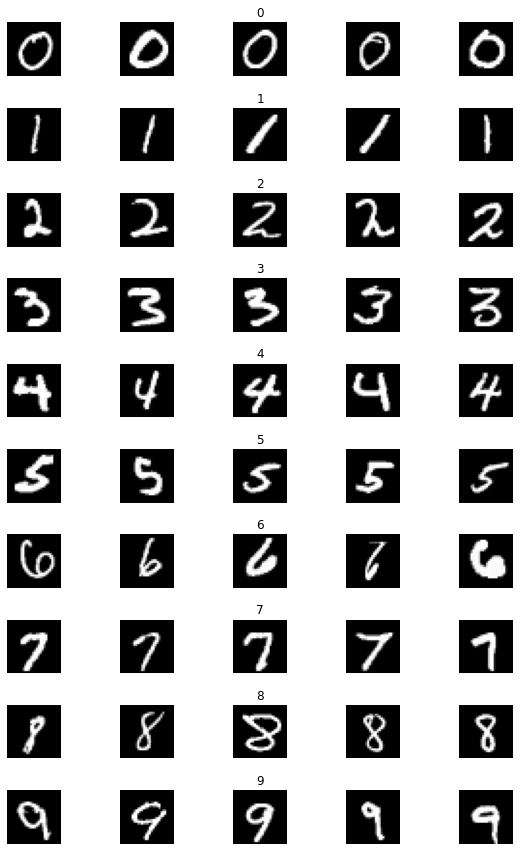

In [37]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axis = plt.subplots ( nrows = num_classes, ncols = cols, figsize = (8, 12) )
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[ y_train == j ]
        axis[j][i].imshow( x_selected[ random.randint( 0, len( x_selected ) - 1 ), :, : ], cmap = plt.get_cmap( "gray" ) )
        axis[j][i].axis( "off" )
        if i == 2:
                axis[j][i].set_title( str( j ) )
                num_of_samples.append( len ( x_selected ) )

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of samples / images')

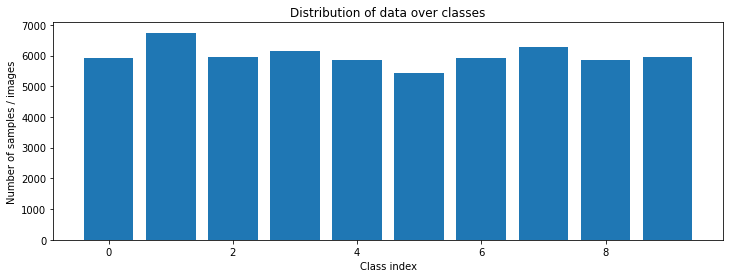

In [38]:
print( num_of_samples )
plt.figure( figsize = ( 12, 4 ) )
plt.bar( range( 0, num_classes), num_of_samples )
plt.title( "Distribution of data over classes" )
plt.xlabel( "Class index" )
plt.ylabel( "Number of samples / images" )

In [39]:
y_train_flat = to_categorical( y_train, num_classes )
y_test_flat = to_categorical( y_test, num_classes )

In [40]:
X_train = X_train / 255
X_test = X_test / 255

In [41]:
num_pixels = X_train.shape[ 1 ] * X_train.shape[ 2 ]
X_train_flat = X_train.reshape( ( X_train.shape[ 0 ], num_pixels ) )
X_test_flat = X_test.reshape( ( X_test.shape[ 0 ], num_pixels ) )
print( X_train_flat.shape )
print( X_test_flat.shape )

(60000, 784)
(10000, 784)


In [42]:
def create_model():
    model = Sequential()
    model.add ( Dense ( units = num_classes, input_dim = num_pixels, activation = 'relu' ) )
    model.add ( Dense ( units = num_classes, activation = 'relu' ) )
    model.add ( Dense ( units = num_classes, activation = 'softmax' ) )
    model.compile ( Adam( lr = 0.01 ), loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
    return model   

In [43]:
model = create_model()
print( model.summary() )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
print( X_train.shape )
print( X_train_flat.shape )
print( X_test.shape )
print( X_test_flat.shape )
print( y_train.shape )
print( y_train_flat.shape )
print( y_test.shape )
print( y_test_flat.shape )
print ()
h = model.fit( x = X_train_flat, y = y_train_flat, validation_split = 0.1, verbose = 1, batch_size = 200, epochs = 10, shuffle = 'true' )

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)
(60000,)
(60000, 10)
(10000,)
(10000, 10)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.8213 - val_loss: 0.2835 - val_accuracy: 0.9202
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.9096 - val_loss: 0.2331 - val_accuracy: 0.9332
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.9181 - val_loss: 0.2308 - val_accuracy: 0.9350
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2596 - accuracy: 0.9226 - val_loss: 0.2180 - val_accuracy: 0.9362
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2453 - accuracy: 0.9268 - val_loss: 0.2159 - val_accuracy: 0.9348
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2444 - accuracy: 0.9260 - val_loss: 0.2133 - val_accuracy: 0.9375
Epoch 7/10
270/270 [===========================

Text(0.5, 0, 'epoch')

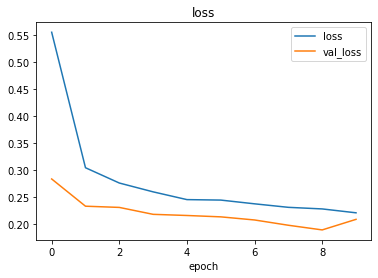

In [45]:
plt.plot( h.history[ 'loss' ] )
plt.plot( h.history[ 'val_loss' ])
plt.legend( [ 'loss', 'val_loss' ] )
plt.title( 'loss' )
plt.xlabel( 'epoch' )

Text(0.5, 0, 'epoch')

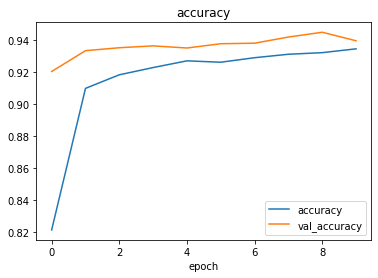

In [46]:
plt.plot( h.history[ 'accuracy' ] )
plt.plot( h.history[ 'val_accuracy' ])
plt.legend( [ 'accuracy', 'val_accuracy' ] )
plt.title( 'accuracy' )
plt.xlabel( 'epoch' )

In [47]:
score = model.evaluate( X_test_flat, y_test_flat, verbose=0 )
print( type( score ) )
print( "Test score:", score[ 0 ] )
print( "Test accuracy:", score[ 1 ] )

<class 'list'>
Test score: 0.2474006861448288
Test accuracy: 0.9304999709129333


<Response [200]>
(130, 131)


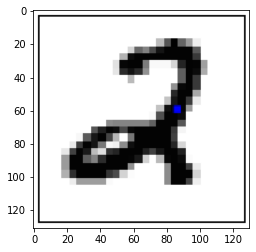

In [48]:
import requests
from PIL import Image
url = "https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
response = requests.get( url, stream=True )
print( response )
img = Image.open( response.raw )
plt.imshow( img )
print ( img.size )

(131, 130, 3)


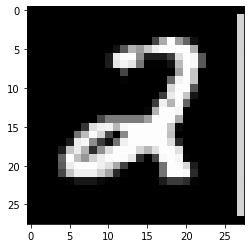

In [53]:
import cv2

img_array = np.asarray( img )
print( img_array.shape )

img_resized = cv2.resize( img_array, ( 28, 28 ) )
gray_scale = cv2.cvtColor( img_resized, cv2.COLOR_BGR2GRAY)
img_inv = cv2.bitwise_not( gray_scale )

plt.imshow( img_inv, cmap = plt.get_cmap( "gray" ) )


In [57]:
image = img_inv / 255
image = image.reshape( 1, img_inv.shape[ 0 ] * img_inv.shape[ 1 ] )

In [59]:
#prediction = model.predict_classes( image )
prediction = np.argmax( model.predict( image ), axis=-1)
print( "predicted digit:", str( prediction ) )

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experime